In [1]:
import pandas as pd
import os
import seaborn

In [2]:
data = pd.read_csv(r"C:\Users\mygoa\Desktop\B.Tech_MajorProject\Dataset\food_coded.csv")
data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [3]:
features = data.columns

In [4]:
features_by_dtype = {}
for f in features:
    dtype = str(data[f].dtype)
    
    if dtype not in features_by_dtype.keys():
        features_by_dtype[dtype] = [f]
  
   
    else:
        features_by_dtype[dtype] += [f]

In [5]:
def code(value, code_dictionary):
    if value in code_dictionary.keys():
        return code_dictionary[value]
    else:
        return value
    
def ordinalizer(data,feature):
    output = {}
    unique = sorted(data[feature].unique().tolist())
    j = 1
    for i in [i for i in unique if str(i) != "nan"]:
        output[i] = j
        j += 1
    
    return output
    
def code_features_as_ordinal(data, to_be_coded):
    
    for feature in to_be_coded:
  
        cd = ordinalizer(data,feature)
        data[feature] = data[feature].apply(code, code_dictionary=cd)

In [6]:
food_calorie_perception = [i for i in features_by_dtype["int64"] if "calories" in i]
food_calorie_perception += ["calories_scone", "tortilla_calories"]

In [7]:
code_features_as_ordinal(data,food_calorie_perception)

In [8]:
discrete_features = [i for i in features_by_dtype["int64"] if (not "calories" in i) & (data[i].unique().size > 2) & ("coded" not in i)]
discrete_features += ["calories_day","cook","exercise","persian_food"]

In [9]:
remove = [15,102,104,2,32,74,61]
data = data.drop(remove,0)

data.loc[67,"weight"] = "144"
data.loc[3, "weight"]= "240"
data["weight"] = data["weight"].apply(int)

data.loc[73,"GPA"] = 3.79
data["GPA"] = data["GPA"].apply(float)

In [10]:
data[discrete_features + food_calorie_perception + ["GPA", "weight"]].head()

,eating_out,ethnic_food,fruit_day,grade_level,greek_food,healthy_feeling,indian_food,italian_food,nutritional_check,parents_cook,...,cook,exercise,persian_food,calories_chicken,turkey_calories,waffle_calories,calories_scone,tortilla_calories,GPA,weight
0,3,1,5,2,5,2,5,5,5,1,...,2.0,1.0,5.0,2,1,4,1.0,4.0,2.400,187
1,2,4,4,4,4,5,4,4,4,1,...,3.0,1.0,4.0,3,3,3,2.0,2.0,3.654,155
3,2,5,4,4,5,7,5,5,2,1,...,2.0,3.0,5.0,2,3,4,2.0,2.0,3.200,240
4,2,4,4,4,4,6,2,5,3,1,...,1.0,1.0,2.0,4,2,2,2.0,3.0,3.500,190
5,1,4,2,2,2,4,5,5,1,2,...,3.0,2.0,5.0,3,1,4,3.0,3.0,2.250,190


In [11]:
discrete_features + food_calorie_perception + ["GPA", "weight"]

['eating_out',
 'ethnic_food',
 'fruit_day',
 'grade_level',
 'greek_food',
 'healthy_feeling',
 'indian_food',
 'italian_food',
 'nutritional_check',
 'parents_cook',
 'pay_meal_out',
 'thai_food',
 'veggies_day',
 'calories_day',
 'cook',
 'exercise',
 'persian_food',
 'calories_chicken',
 'turkey_calories',
 'waffle_calories',
 'calories_scone',
 'tortilla_calories',
 'GPA',
 'weight']

In [12]:
from scipy.stats import pearsonr,spearmanr,kendalltau
from pandas import DataFrame

def correlation_table(data,numerical_features,target):
    
    rows_list = []

    for x2 in numerical_features:
    
        x1 = target
        
        row = {}
        row["Variable A"] = x1 
        row["Variable B"] = x2
        
        x3 = data[data[x1].notnull() & data[x2].notnull()]

        pearson = pearsonr(x3[x1],x3[x2])
        row["Pearson"] = pearson[0]
        row["Pearson's p-value"] = pearson[1]

        spearman = spearmanr(x3[x1],x3[x2])
        row["Spearman"] = spearman[0]
        row["Spearman's p-value"] = spearman[1]

        kendall = kendalltau(x3[x1],x3[x2])
        row["Kendall"] = kendall[0]
        row["Kendall's p-value"] = kendall[1]

        rows_list.append(row)

    ordered_columns = ["Variable A", "Variable B", "Pearson", "Pearson's p-value", "Spearman", "Spearman's p-value", "Kendall", "Kendall's p-value"]
    
    corr = DataFrame(rows_list, columns=ordered_columns).round(2)
    corr = corr[(corr["Variable A"] == target) | (corr["Variable B"] == target)]
    return corr

In [13]:
from seaborn import regplot, set_style
from matplotlib.pyplot import show, suptitle
from scipy.stats import linregress
from IPython.display import display

def display_nxn_analysis(data,feature,target):

    
    set_style("whitegrid")
    ax = regplot(data=data,x=feature, y=target, marker="x", scatter_kws={"s": 50})
    suptitle(target + " x " + feature)
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    show()

    
    print("Correlation Scores")
    corr = correlation_table(data,[feature],target)
    display(corr)
    
    
    print("Simple Linear Regression")
    no_nulls = data[data[feature].notnull() & data[target].notnull()]
    slope, intercept, r_value, p_value, std_err = linregress(no_nulls[feature],no_nulls[target])
    display(DataFrame([{"R^2" : r_value, "standard error" : std_err, "p-value" : p_value,}]).round(2))

In [14]:
GPA_corr = correlation_table(data,discrete_features+food_calorie_perception,"GPA")
pearson_p = GPA_corr["Pearson's p-value"] < 0.05
spearman_p = GPA_corr["Spearman's p-value"] < 0.05
kendall_p = GPA_corr["Kendall's p-value"] < 0.05
GPA_corr = GPA_corr.loc[pearson_p | spearman_p | kendall_p]
GPA_corr

,Variable A,Variable B,Pearson,Pearson's p-value,Spearman,Spearman's p-value,Kendall,Kendall's p-value
1,GPA,ethnic_food,0.21,0.02,0.20,0.03,0.15,0.03
3,GPA,grade_level,0.25,0.01,0.25,0.01,0.19,0.01
9,GPA,parents_cook,0.23,0.01,0.27,0.00,0.22,0.00
11,GPA,thai_food,0.18,0.05,0.19,0.04,0.15,0.04
18,GPA,turkey_calories,0.23,0.01,0.19,0.03,0.15,0.03


In [15]:
numeric = iter(GPA_corr["Variable B"].tolist())

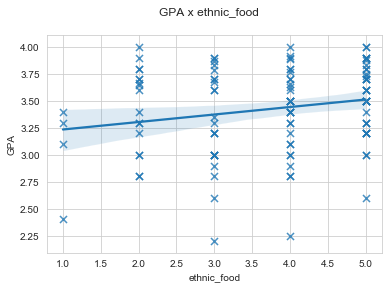

Correlation Scores


,Variable A,Variable B,Pearson,Pearson's p-value,Spearman,Spearman's p-value,Kendall,Kendall's p-value
0,GPA,ethnic_food,0.21,0.02,0.2,0.03,0.15,0.03


Simple Linear Regression


,R^2,standard error,p-value
0,0.21,0.03,0.02


In [16]:
display_nxn_analysis(data,next(numeric),"GPA")

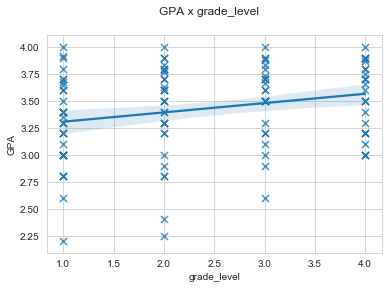

Correlation Scores


,Variable A,Variable B,Pearson,Pearson's p-value,Spearman,Spearman's p-value,Kendall,Kendall's p-value
0,GPA,grade_level,0.25,0.01,0.25,0.01,0.19,0.01


Simple Linear Regression


,R^2,standard error,p-value
0,0.25,0.03,0.01


In [17]:
display_nxn_analysis(data,next(numeric),"GPA")

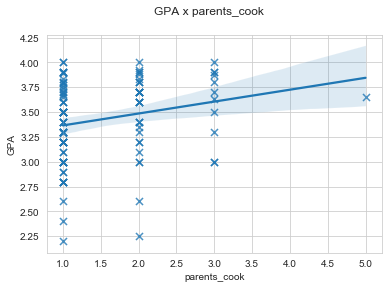

Correlation Scores


,Variable A,Variable B,Pearson,Pearson's p-value,Spearman,Spearman's p-value,Kendall,Kendall's p-value
0,GPA,parents_cook,0.23,0.01,0.27,0.0,0.22,0.0


Simple Linear Regression


,R^2,standard error,p-value
0,0.23,0.05,0.01


In [18]:
display_nxn_analysis(data,next(numeric),"GPA")

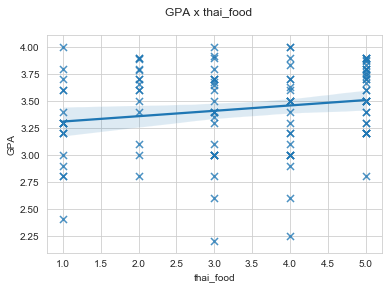

Correlation Scores


,Variable A,Variable B,Pearson,Pearson's p-value,Spearman,Spearman's p-value,Kendall,Kendall's p-value
0,GPA,thai_food,0.18,0.05,0.19,0.04,0.15,0.04


Simple Linear Regression


,R^2,standard error,p-value
0,0.18,0.02,0.05


In [19]:
display_nxn_analysis(data,next(numeric),"GPA")

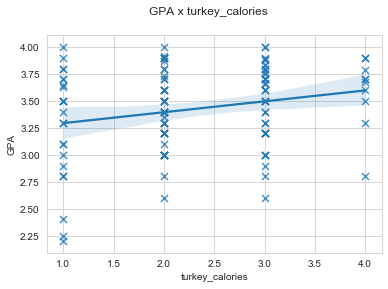

Correlation Scores


,Variable A,Variable B,Pearson,Pearson's p-value,Spearman,Spearman's p-value,Kendall,Kendall's p-value
0,GPA,turkey_calories,0.23,0.01,0.19,0.03,0.15,0.03


Simple Linear Regression


,R^2,standard error,p-value
0,0.23,0.04,0.01


In [20]:
display_nxn_analysis(data,next(numeric),"GPA")

In [21]:
weight_corr = correlation_table(data,discrete_features+food_calorie_perception,"weight")
pearson_p = weight_corr["Pearson's p-value"] < 0.05
spearman_p = weight_corr["Spearman's p-value"] < 0.05
kendall_p = weight_corr["Kendall's p-value"] < 0.05
weight_corr = weight_corr.loc[pearson_p | spearman_p | kendall_p]
weight_corr

,Variable A,Variable B,Pearson,Pearson's p-value,Spearman,Spearman's p-value,Kendall,Kendall's p-value
3,weight,grade_level,0.16,0.09,0.19,0.04,0.14,0.05
12,weight,veggies_day,-0.19,0.04,-0.20,0.03,-0.15,0.03


In [22]:
numeric = iter(weight_corr["Variable B"].tolist())

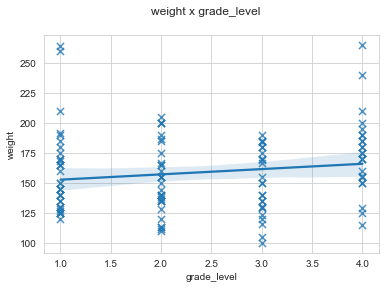

Correlation Scores


,Variable A,Variable B,Pearson,Pearson's p-value,Spearman,Spearman's p-value,Kendall,Kendall's p-value
0,weight,grade_level,0.16,0.09,0.19,0.04,0.14,0.05


Simple Linear Regression


,R^2,standard error,p-value
0,0.16,2.59,0.09


In [23]:
display_nxn_analysis(data,next(numeric),"weight")

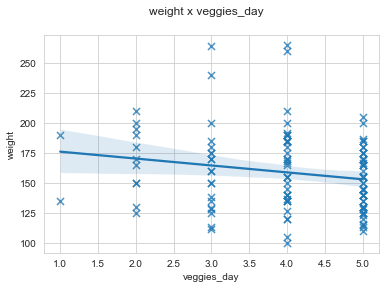

Correlation Scores


,Variable A,Variable B,Pearson,Pearson's p-value,Spearman,Spearman's p-value,Kendall,Kendall's p-value
0,weight,veggies_day,-0.19,0.04,-0.2,0.03,-0.15,0.03


Simple Linear Regression


,R^2,standard error,p-value
0,-0.19,2.75,0.04


In [24]:
display_nxn_analysis(data,next(numeric),"weight")